<a href="https://colab.research.google.com/github/NurEser/Machine-Learning-Fundamentals-Laboratory-Exercices-MPA-MLF/blob/main/miniproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Examination**


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/Data_prepared_final.csv")

In [ ]:
df

,Unnamed: 0,time [s],cfo_meas,cfo_demod,gain_imb,iq_imb,or_off,quadr_err,ph_err,mag_err,evm
0,0,45181.524,-414,-421.076324,0.076097,-46.987598,-27.219631,0.104362,1.129778,0.440299,2.059935
1,1,45182.129,-414,-423.571686,0.069879,-47.852627,-26.934967,0.053158,1.050010,0.431240,1.815053
2,2,45182.550,-414,-421.033936,0.061466,-48.968697,-27.130722,-0.045913,0.989473,0.447790,1.762053
3,3,45182.971,-414,-420.103546,0.078836,-46.756973,-27.005318,0.081583,1.085091,0.443476,1.894204
4,4,45183.551,-432,-420.781097,0.066053,-47.048218,-27.358521,0.081920,1.023701,0.465225,1.805841
...,...,...,...,...,...,...,...,...,...,...,...
19195,19195,54245.724,216,215.584991,0.077551,-35.409054,-28.611925,1.875334,0.999375,1.427339,2.248822
19196,19196,54246.340,216,215.247406,0.044961,-35.508205,-27.954048,1.898758,1.031501,1.478366,2.320668
19197,19197,54246.770,216,216.761307,0.070066,-35.038486,-28.467575,2.015116,1.090227,1.468599,2.382019
19198,19198,54247.379,216,215.353516,0.048611,-35.413639,-28.528139,1.916172,0.999381,1.497681,2.283976


In [ ]:
#checking for missing values
missing_values = df.isnull().sum()
print(missing_values)

Unnamed: 0    0
time [s]      0
cfo_meas      0
cfo_demod     0
gain_imb      0
iq_imb        0
or_off        0
quadr_err     0
ph_err        0
mag_err       0
evm           0
dtype: int64


In [ ]:
statistical_summary = df.describe()
print(statistical_summary)

        Unnamed: 0      time [s]      cfo_meas     cfo_demod      gain_imb  \
count  19200.00000  19200.000000  19200.000000  19200.000000  19200.000000   
mean    9599.50000  55576.863098   -371.935313   -371.947495      0.044069   
std     5542.70692   9172.729635    411.673405    412.653152      0.046804   
min        0.00000  38570.683000  -1350.000000  -1362.152710     -0.321390   
25%     4799.75000  51357.789500   -594.000000   -588.136505      0.007017   
50%     9599.50000  56329.446000   -396.000000   -399.890656      0.060500   
75%    14399.25000  61100.247000   -216.000000   -219.575092      0.078351   
max    19199.00000  70921.969000    720.000000    737.512390      0.176385   

             iq_imb        or_off     quadr_err        ph_err       mag_err  \
count  19200.000000  19200.000000  19200.000000  19200.000000  19200.000000   
mean     -35.193488    -31.121596      0.406988      1.232678      1.832523   
std        5.399075      3.719265      2.511028      0.24056

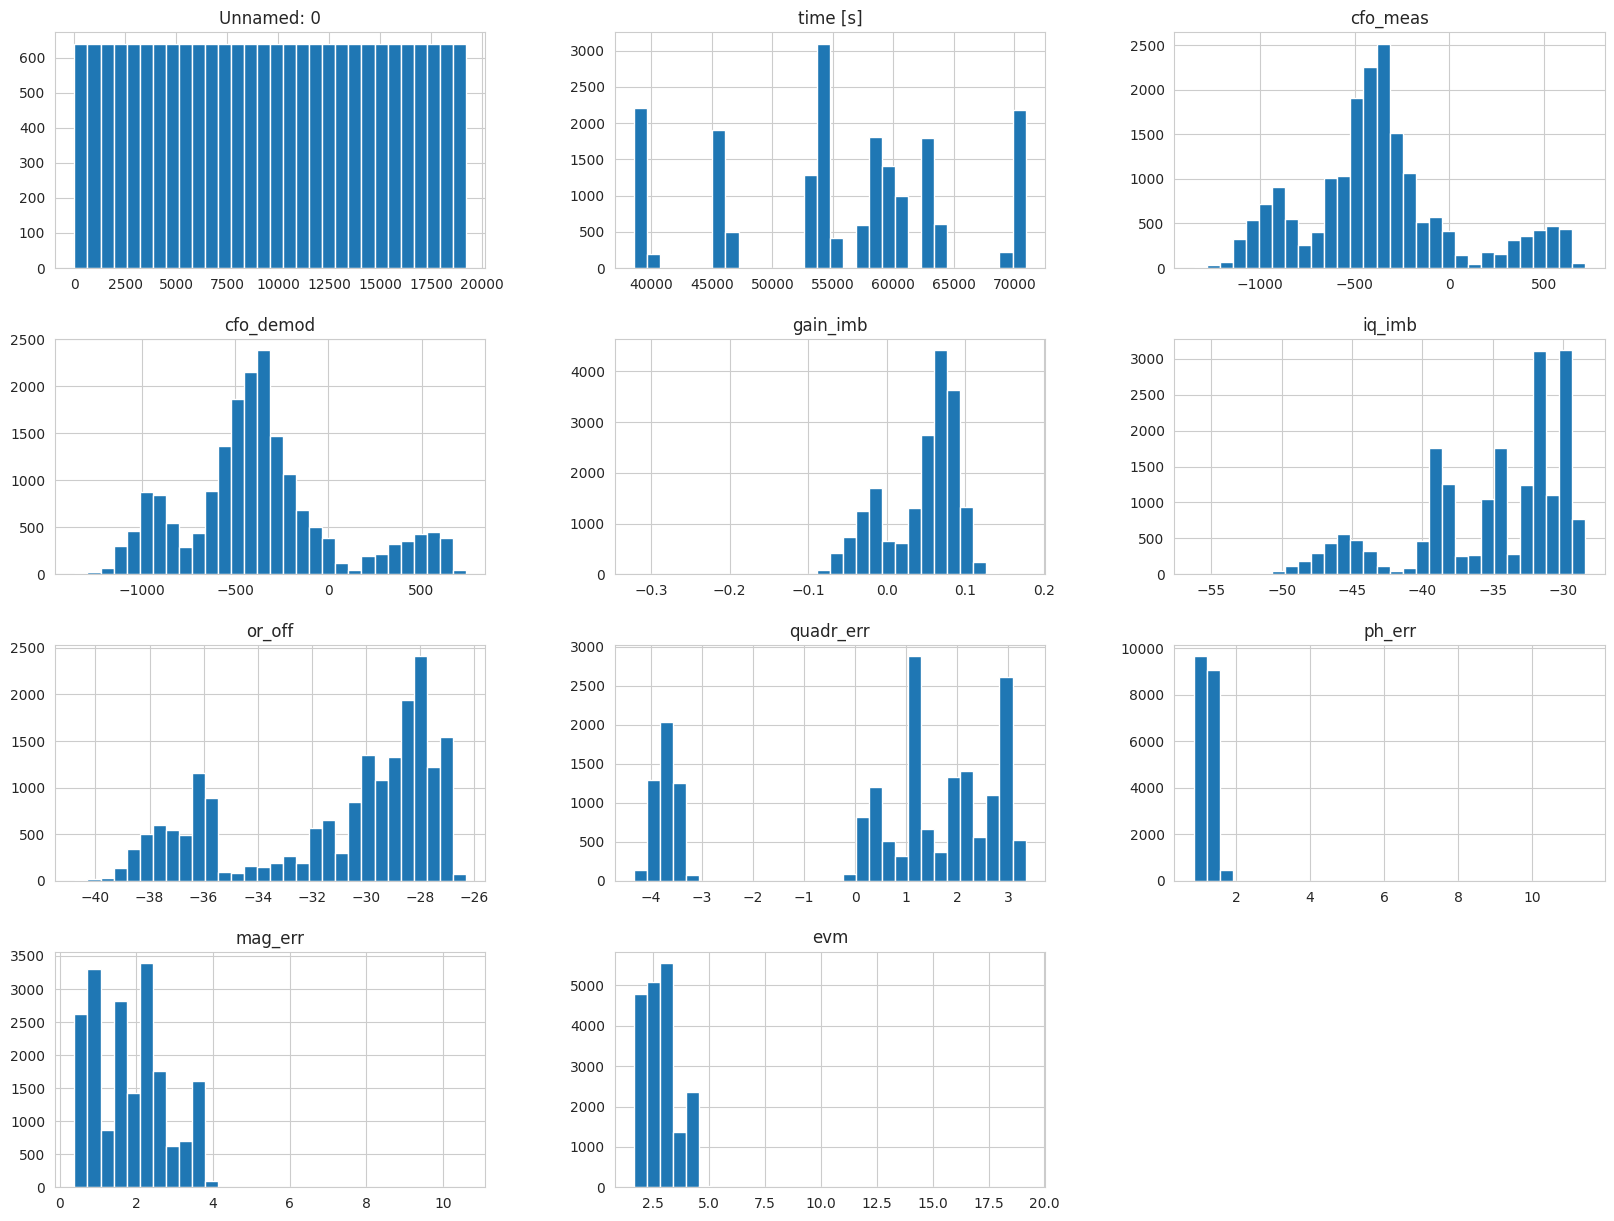

In [ ]:
# Histograms for each feature

sns.set_style("whitegrid")

df.hist(bins=30, figsize=(20, 15))
plt.show()

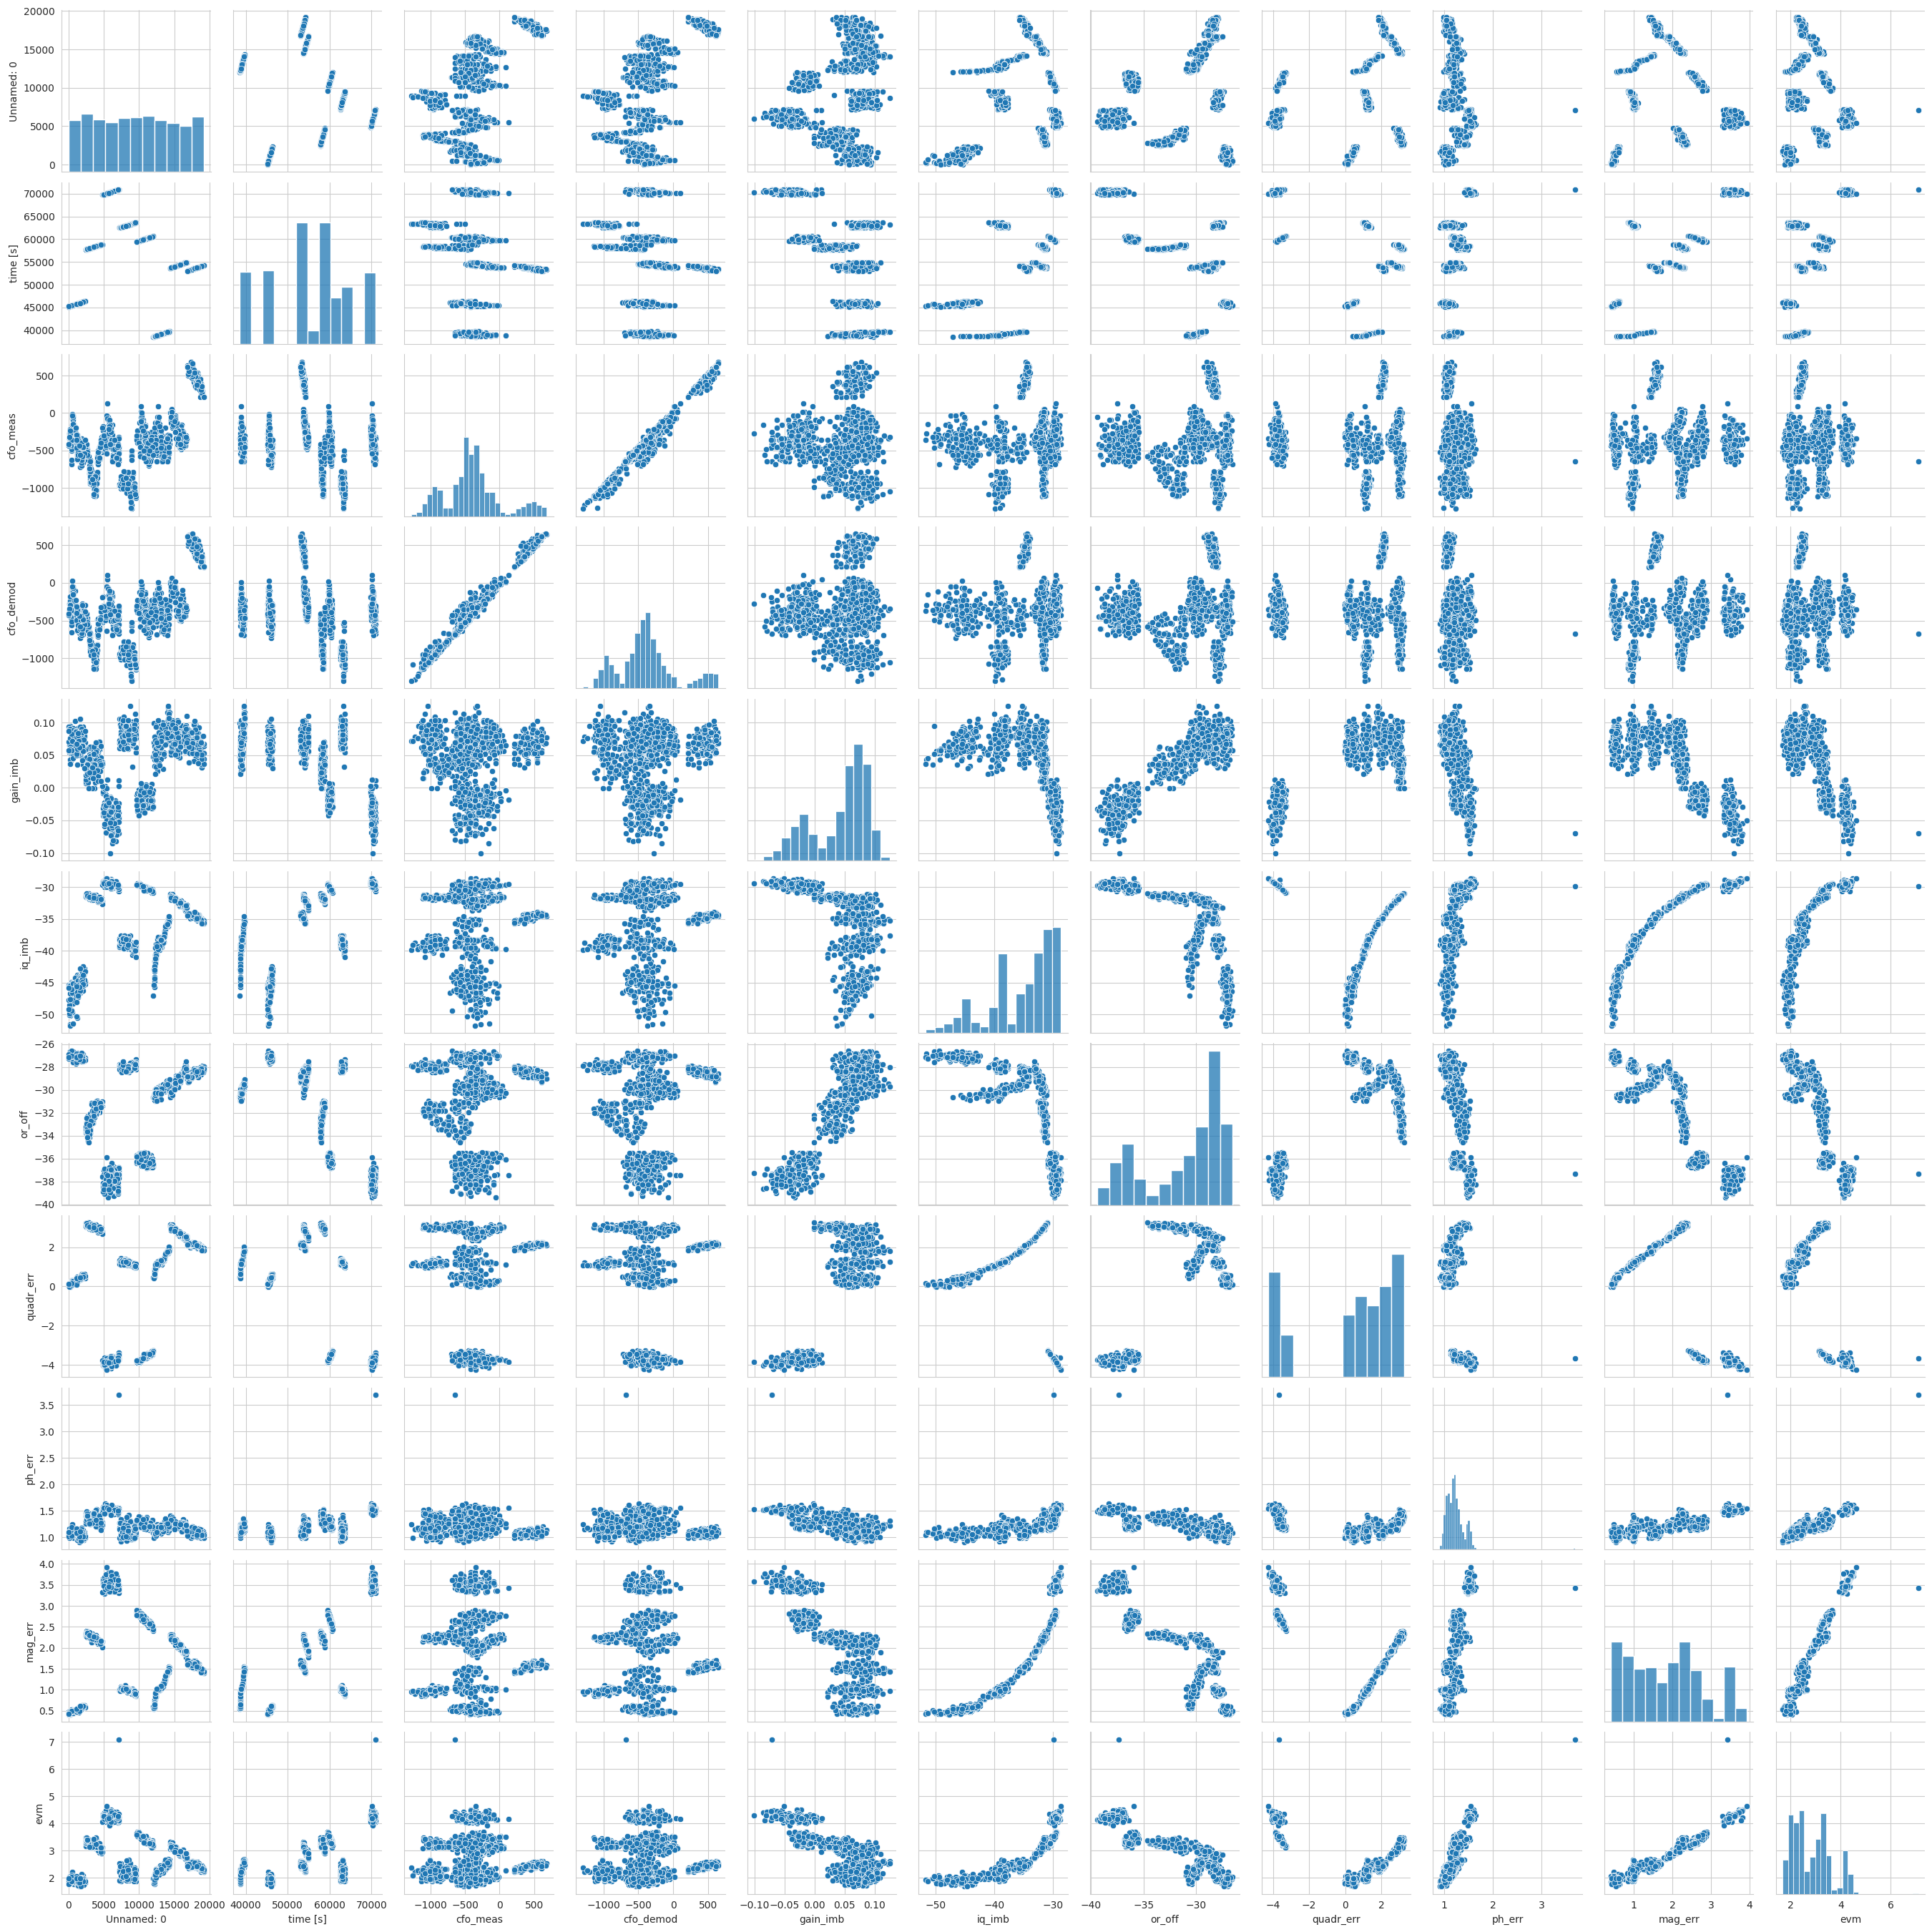

In [ ]:
# Pairplot to visualize relationships between features

sns.pairplot(df.sample(1000))
plt.show()

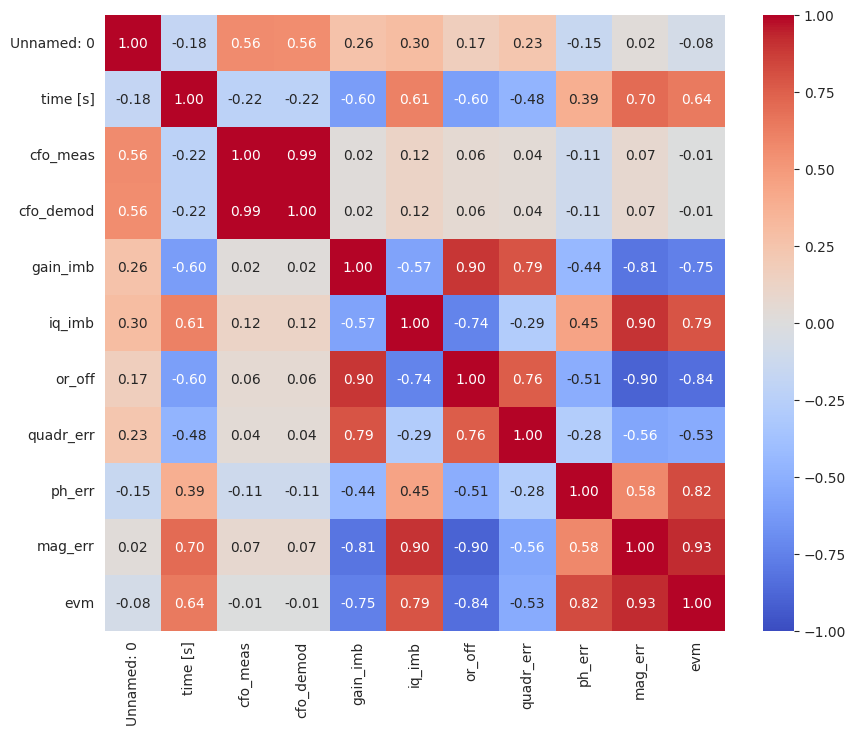

In [ ]:
# Heatmap to see correlation between features

correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

From the heatmap and pairplots, we can see that some features are highly correlated. cfo_meas and cfo_demod which refer to Carrier Frequency Offset(CFO) measured via vector spectrum and CFO measured after demodulation are highly correlated with correlation score as high as 0.99.  We could also see it from the pairplot. These two features have linear pairplots.

Other high correlated features:
- evm and mag_err (0.93)
- mag_err and iq_imb (0.9)
- gain_imb and or_off (0.9)

Since our features have high correlation we can do Principal Component Analysis to reduce dimensionality and aim to capture the variance of the data with less features.


# **Data Preprocessing**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import numpy as np


In [ ]:
features = df[['cfo_meas', 'cfo_demod', 'gain_imb', 'iq_imb', 'or_off', 'quadr_err', 'ph_err', 'mag_err', 'evm']]


## Normalization

In [ ]:
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)


##PCA

We selected the number of principal components based on the explained variance ratio, aiming to retain enough components to account for 90-95% of the total variance.





In [ ]:
pca = PCA(n_components = 0.95)
pca.fit(features_scaled)
features_pca = pca.transform(features_scaled)


In [ ]:
#checking how many components were kept to explain the desired variance of 95%

n_components = pca.n_components_
print(f"Number of components:   {n_components}")

#checking how much each component contributes
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance ratio of the {n_components} components: {np.cumsum(explained_variance)}")

Number of components:   3
Explained variance ratio of the 3 components: [0.57841964 0.83488873 0.97623015]


We can observe how much each original feature contributes to principal components called as component loadings. In order to do that we create a dataframe with original feature names of the loadings.

In [ ]:
loadings = pca.components_

loadings_df = pd.DataFrame(loadings, columns=features.columns, index=[f'Component {i+1}' for i in range(loadings.shape[0])])

print(loadings_df)



             cfo_meas  cfo_demod  gain_imb    iq_imb    or_off  quadr_err  \
Component 1 -0.022378  -0.021955 -0.202661  0.280601 -0.577442  -0.711562   
Component 2  0.698723   0.690339 -0.009869  0.168117 -0.016472   0.055182   
Component 3  0.119104   0.118620  0.030189 -0.670292  0.316731  -0.603781   

               ph_err   mag_err       evm  
Component 1  0.023971  0.178654  0.083412  
Component 2 -0.004285  0.057649  0.014094  
Component 3 -0.035035 -0.214624 -0.096851  


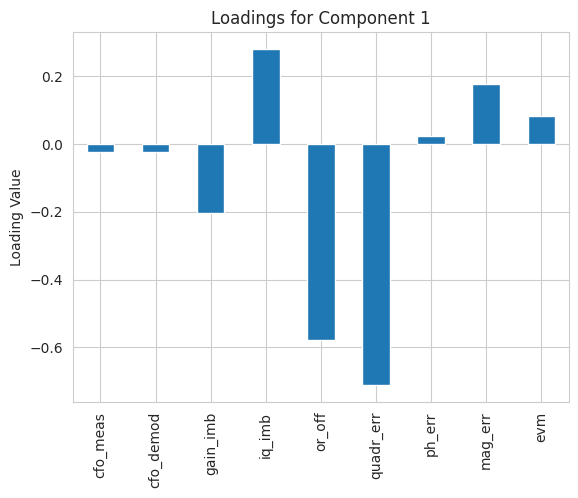

In [ ]:
#Visualization for component 1

plt.figure()
loadings_df.loc['Component 1'].plot(kind='bar')
plt.title('Loadings for Component 1')
plt.ylabel('Loading Value')
plt.show()

**Magnitude of Loadings**
High Absolute Values: Features with high absolute loading values (whether positive or negative) have a strong influence on the principal component. These features drive the variance that the component captures from the dataset.

Low Values: Features with loading values near zero have little influence on the component. These features don't contribute much to the variance captured by that component.

**Direction of Loadings (Sign)**
Positive Loadings: Features with positive loading values contribute positively to the component score. As the value of these features increases, the component score increases.

Negative Loadings: Features with negative loading values contribute inversely to the component score. As the value of these features increases, the component score decreases.



# **K-Means**


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Elbow Method


In [ ]:
inertias = []
for k in range(1,11):
  kmeans = KMeans(k,random_state =42) #we can play with random_state and compare the results!!!
  kmeans.fit(features_pca)
  inertias.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

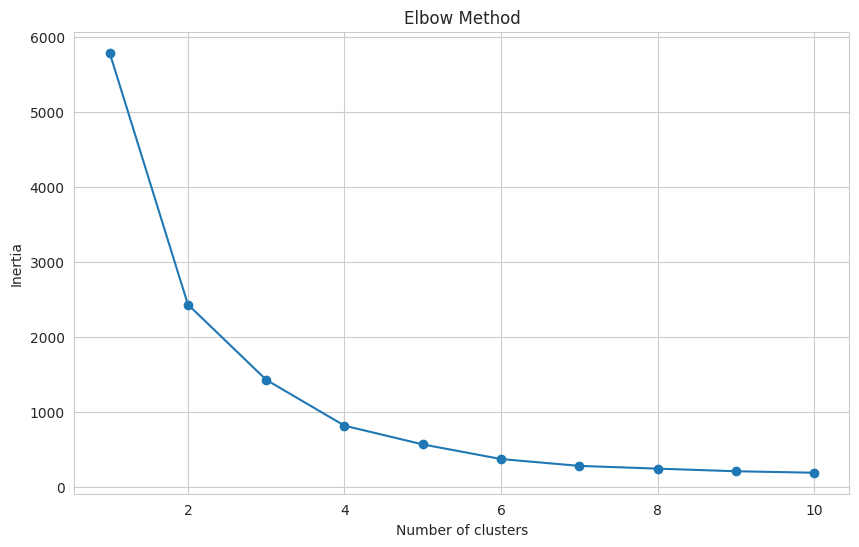

In [ ]:
#plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Upon analyzing the plot, elbow method suggest 2-3 as the optimal number of clusters. We will also calculate silhouette scores and visualize the results to decide on the optimal number.  

## Silhouette Score

In [ ]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_pca)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(features_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {k}, the silhouette score is {silhouette_avg}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2, the silhouette score is 0.5988713165514805


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3, the silhouette score is 0.5302586622265253


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4, the silhouette score is 0.5720146435564134


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5, the silhouette score is 0.6019350678682512


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6, the silhouette score is 0.6396427351244186


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7, the silhouette score is 0.6552563206024888


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8, the silhouette score is 0.5407143135266479


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 9, the silhouette score is 0.5460263961955109


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 10, the silhouette score is 0.5313153797207238


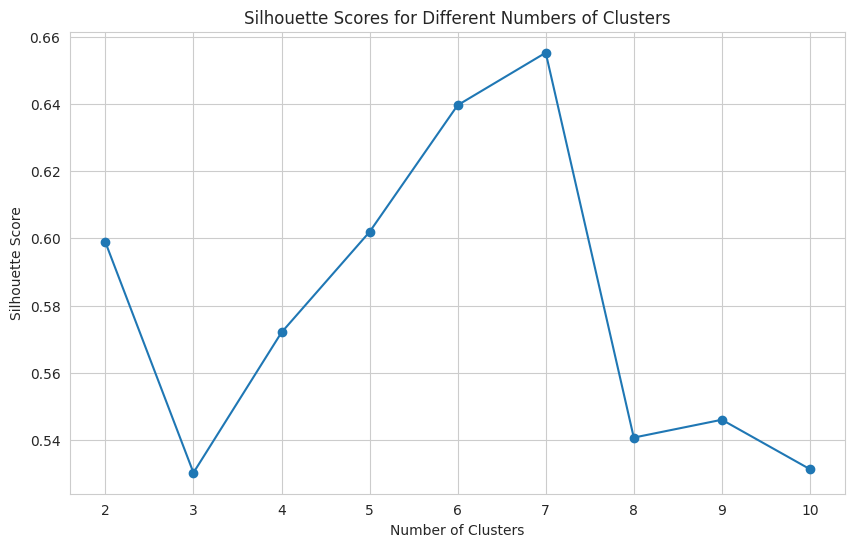

In [ ]:
#plot
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

2 clusters here also give high silhouette score. But the highest score is for 7 clusters. Since we have 3 principal components we can visualize the data points on the 3D plot and decide which captures our data better.

# **3D Visualization**

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
def visualize_3D(features_pca, cluster_labels):

  fig = plt.figure(figsize=(10, 8))
  ax = fig.add_subplot(111, projection='3d')

  colors = ['r', 'g', 'b', 'y', 'c', 'm' , 'k']

  for i in range(len(features_pca)):
      ax.scatter(features_pca[i, 0], features_pca[i, 1] ,  features_pca[i, 2] ,
                color=colors[cluster_labels[i]], s=50, alpha=0.5)

  ax.set_xlabel('Principal Component 1')
  ax.set_ylabel('Principal Component 2')
  ax.set_zlabel('Principal Component 3')
  ax.set_title('3D Visualization of Clusters in PCA-transformed Space')

  plt.show()


## 2 Clusters

In [1]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(features_pca)
cluster_labels = kmeans.labels_
visualize_3D(features_pca,cluster_labels)

NameError: name 'KMeans' is not defined

## 7 Clusters

In [ ]:
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(features_pca)
cluster_labels = kmeans.labels_
visualize_3D(features_pca,cluster_labels)